In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import numpy as np
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
from matplotlib import pyplot as plt
plt.rcParams['axes.grid'] = True

In [3]:
dat = pd.read_csv("../case-hosp-death.csv")
dat["DATE_OF_INTEREST"] = pd.to_datetime(dat["DATE_OF_INTEREST"])
dat = dat.set_index("DATE_OF_INTEREST")

In [4]:
dat.head()

,NEW_COVID_CASE_COUNT,HOSPITALIZED_CASE_COUNT,DEATH_COUNT
DATE_OF_INTEREST,,,
2020-03-02,1,12.0,NaN
2020-03-03,3,7.0,NaN
2020-03-04,10,10.0,NaN
2020-03-05,2,15.0,NaN
2020-03-06,8,11.0,NaN


Text(0.5, 1.0, 'Cases/day')

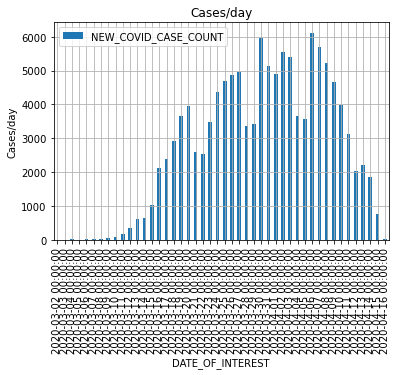

In [5]:
dat[["NEW_COVID_CASE_COUNT"]].plot(kind="bar")
plt.ylabel("Cases/day")
plt.title("Cases/day")

In [6]:
dat["Cases/day, 7 day avg"] = dat["NEW_COVID_CASE_COUNT"].rolling(window="7D").mean()

Text(0.5, 1.0, 'Cases/day, 7 day average')

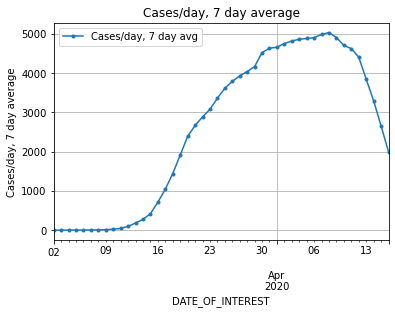

In [7]:
dat[["Cases/day, 7 day avg"]].plot(style=".-")
plt.ylabel("Cases/day, 7 day average")
plt.title("Cases/day, 7 day average")

In [47]:
hdat = pd.read_csv("../history.csv")
hdat["DATE_OF_INTEREST"] = pd.to_datetime(hdat["DATE_OF_INTEREST"])
hdat["AS_OF"] = pd.to_datetime(hdat["AS_OF"])

In [48]:
hdat.head()

,DATE_OF_INTEREST,AS_OF,"Cases/day, 7 day avg",DEATH_COUNT,"Deaths/day, 7 day avg",HOSPITALIZED_CASE_COUNT,"Hospitalized/day, 7 day avg",NEW_COVID_CASE_COUNT
0,2020-03-02,2020-03-26 11:26:41,1.00,NaN,NaN,NaN,NaN,1
1,2020-03-03,2020-03-26 11:26:41,1.50,NaN,NaN,3.0,3.000000,2
2,2020-03-04,2020-03-26 11:26:41,4.00,NaN,NaN,3.0,3.000000,9
3,2020-03-05,2020-03-26 11:26:41,3.25,NaN,NaN,4.0,3.333333,1
4,2020-03-06,2020-03-26 11:26:41,4.20,NaN,NaN,5.0,3.750000,8


In [49]:
dp = hdat.pivot_table(index="DATE_OF_INTEREST",
                      columns="AS_OF",
                      values="Cases/day, 7 day avg")

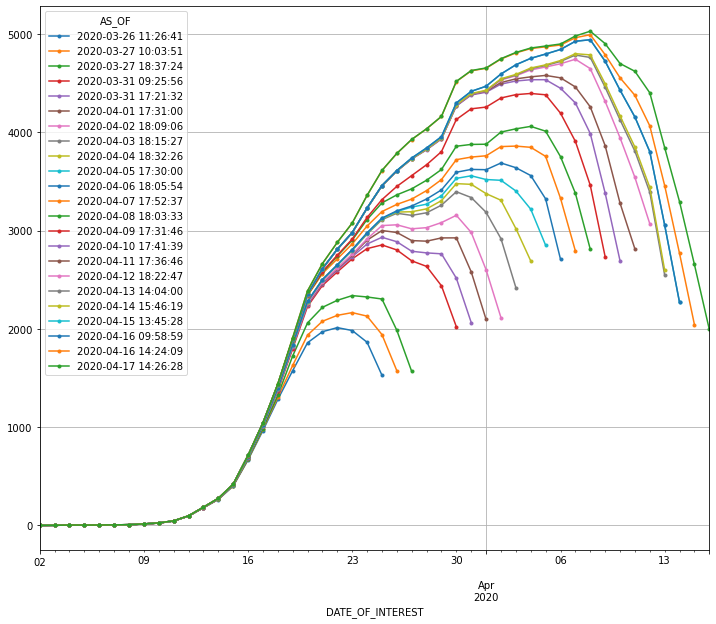

In [50]:
fig, ax = plt.subplots(figsize=(12,10))
dp.plot(style=".-", ax=ax)
#date_form = DateFormatter("%m-%d")
#ax.xaxis.set_major_formatter(date_form)

# Ensure a major tick for each week using (interval=1) 
#ax.xaxis.set_major_locator(mdates.WeekdayLocator(interval=1))
#plt.show()

In [51]:
dp = hdat.pivot_table(index="DATE_OF_INTEREST",
                      columns="AS_OF",
                      values="Deaths/day, 7 day avg")

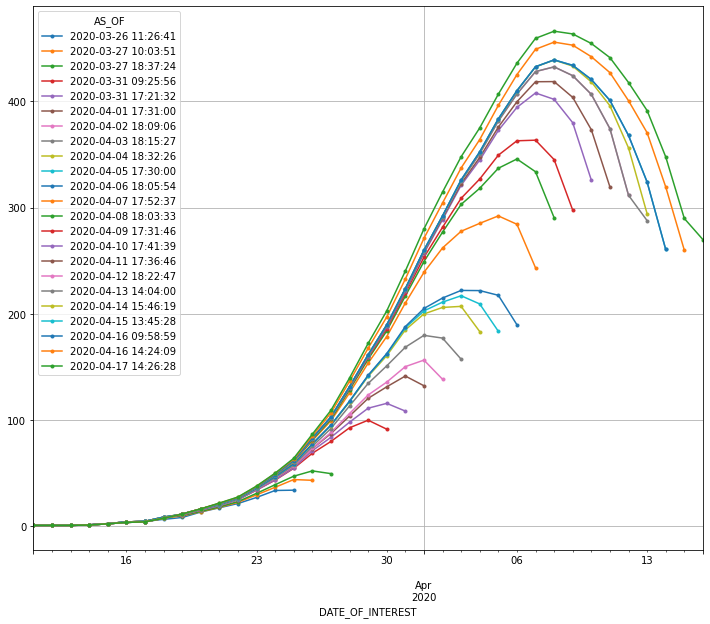

In [52]:
fig, ax = plt.subplots(figsize=(12,10))
dp.plot(style=".-", ax=ax)

In [53]:
hdat["Days"] = hdat.groupby("DATE_OF_INTEREST").cumcount()

In [54]:
df = hdat.groupby("DATE_OF_INTEREST").diff()
df["DATE_OF_INTEREST"] = hdat["DATE_OF_INTEREST"]
df["AS_OF"] = hdat["AS_OF"]
df["Days"] = hdat["Days"]

In [55]:
d2 = df.pivot_table(index="Days",
                   columns="DATE_OF_INTEREST",
                   values="Deaths/day, 7 day avg")

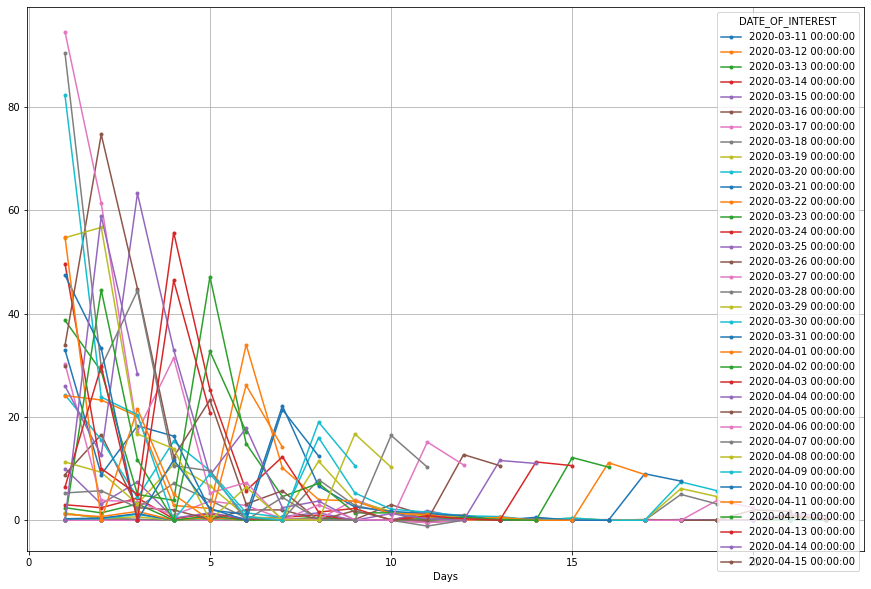

In [56]:
fig, ax = plt.subplots(figsize=(15,10))
d2.plot(style=".-", ax=ax)

In [57]:
d3 = df.pivot_table(index="Days",
                   columns="DATE_OF_INTEREST",
                   values="NEW_COVID_CASE_COUNT")

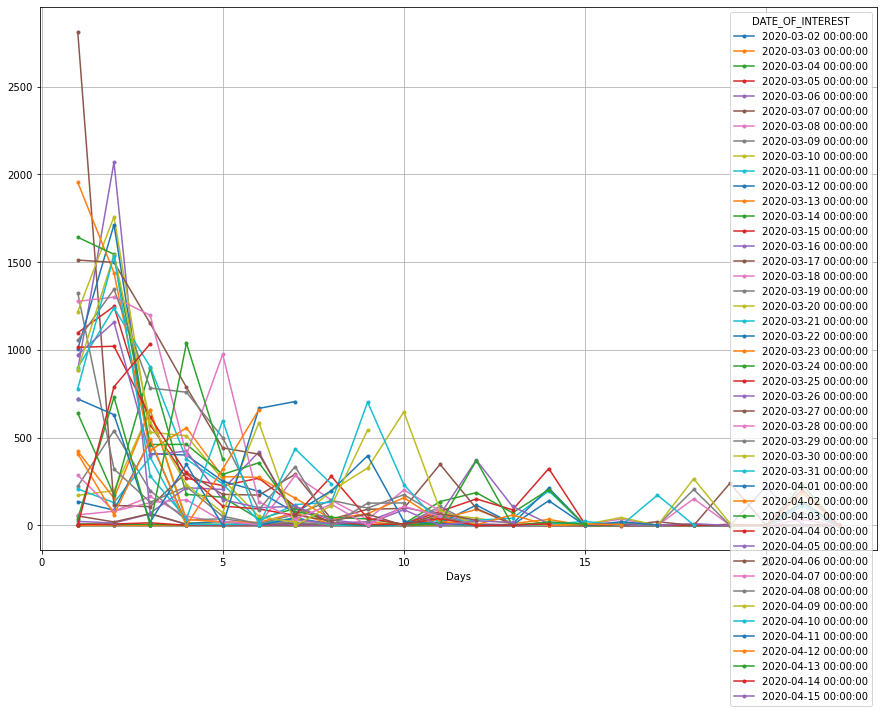

In [58]:
fig, ax = plt.subplots(figsize=(15,10))
d3.plot(style=".-", ax=ax)